<img src='chapter4\img\4-1-1.png'>

# 一 、数据清洗
<img src='chapter4\img\4-1-2.png'>

# 1、缺失值处理
<img src='chapter4\img\4-1-3.png'>


<img src='chapter4\img\4-1-4.png'>


<img src='chapter4\img\4-1-5.png'>

<img src='chapter4\img\4-1-6.png'>

In [1]:
import pandas as pd
from scipy.interpolate import lagrange

inputfile = 'chapter4/data/catering_sale.xls'
data = pd.read_excel(inputfile)
data.head()

,日期,销量
0,2015-03-01,51.0
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


In [1]:
outputfile = 'chapter4/tmp/sale.xls'

data['销量'][(data['销量']<400)|(data['销量']>5000)] = None

def ployinterp_column(s,n,k=5):
    y = s[list(range(n-k,n)) + list(range(n+1,n+1+k))]
    y = y[y.notnull()]
    return lagrange(y.index,list(y))(n)

for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data[i][j] = ployinterp_column(data[i],j)
        
data.to_excel(outputfile)

NameError: name 'data' is not defined

# 2、异常值处理
<img src='chapter4\img\4-1-7.png'>

# 二、数据集成
<img src='chapter4\img\4-2-1.png'>

# 1、实体识别
<img src='chapter4\img\4-2-2.png'>

# 2、冗余属性识别
<img src='chapter4\img\4-2-3.png'>

# 三、数据变换

<img src='chapter4\img\4-3-1.png'>

# 2、规范化
<img src='chapter4\img\4-3-2.png'>

## 数据规范化对基于距离的挖掘算法尤为重要

In [2]:
import pandas as pd
import numpy as np
datafile = 'chapter4\data/normalization_data.xls'
data = pd.read_excel(datafile,header = None)

data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


# 1）最小-最大规范化
<img src='chapter4\img\4-3-3.png'>

In [3]:
data1 = (data - data.min())/(data.max()-data.min()) #最小-最大规范化

In [5]:
data1.corr() 

,0,1,2,3
0,1.000000,-0.089818,-0.246243,0.275755
1,-0.089818,1.000000,0.775011,0.481962
2,-0.246243,0.775011,1.000000,-0.129498
3,0.275755,0.481962,-0.129498,1.000000


In [6]:
data.corr()

,0,1,2,3
0,1.000000,-0.089818,-0.246243,0.275755
1,-0.089818,1.000000,0.775011,0.481962
2,-0.246243,0.775011,1.000000,-0.129498
3,0.275755,0.481962,-0.129498,1.000000


In [8]:
data2.corr()

,0,1,2,3
0,1.000000,-0.089818,-0.246243,0.275755
1,-0.089818,1.000000,0.775011,0.481962
2,-0.246243,0.775011,1.000000,-0.129498
3,0.275755,0.481962,-0.129498,1.000000


# 2）零-均值规范化
<img src='chapter4\img\4-3-4.png'>

In [9]:
(data - data.mean()) / data.std() #零-均值规范化

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


# 3）小数定标规范化
<img src='chapter4\img\4-3-5.png'>

In [6]:
data/10**np.ceil(np.log10(data.abs().max())) #小数定标标准化

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


### ceil

np.ceil 函数返回输入值的上限，即对于输入 x ，返回最小的整数 i ，使得 i> = x。

# 3、连续属性离散化

<img src='chapter4\img\4-3-6.png'>

In [10]:
   # 对原始数据可视化 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (18,5))

plt.plot(data,'*')

# pandas.cut函数说明

###  功能:将数据进行离散化
pandas.cut(x,bins,right=True,labels=None,retbins=False,precision=3,include_lowest=False)     

### 参数说明:     x   :进行划分的一维数组     

bins : 1,整数---将x划分为多少个等间距的区间

       2,序列—将x划分在指定的序列中，若不在该序列中，则是NaN

 right :是否包含右端点

 labels :是否用标记来代替返回的bins
 
  precision:精度

 include_lowest:是否包含左端点
 
   返回值:

     如果retbins = False 则返回x中每个值对应的bin的列表，否者则返回x中每个值对应的bin的列表和对应的bins



In [13]:
#将肝气郁结证型系数数据导入
import pandas as pd

datafile = 'chapter4\data\discretization_data.xls'
data = pd.read_excel(datafile)
data.head()

,肝气郁结证型系数
0,0.056
1,0.488
2,0.107
3,0.322
4,0.242


In [14]:
data = data['肝气郁结证型系数'].copy()
k = 4 #将数据分为四类

# 1) 等宽离散化

In [15]:

d1 = pd.cut(data,k,labels = range(k))
d1.head()

0    0
1    3
2    0
3    2
4    1
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

# 2) 等频离散化

In [16]:
w = [1.0*i/k for i in range(k+1)]
w = data.describe(percentiles = w)[4:4+k+1]  #使用describe函数自动计算分位数
w[0] = w[0] *(1-1e-10)
d2 = pd.cut(data,w,labels = range(k))
d2.head()

0    0
1    3
2    0
3    3
4    2
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

# 3) 基于聚类分析的方法
## （一维）聚类离散化

### loc——通过行标签索引行数据
### iloc——通过行号获取行数据

### kmodel.fit(data.reshape((-1,1))) # 训练模型

### 原因：
Series数据类型没有reshape函数
### 解决办法：
用values方法将Series对象转化成numpy的ndarray，再用ndarray的reshape方法.
### 重新输入：
kmodel.fit(data.values.reshape((-1,1))) # 训练模型

In [17]:
from sklearn.cluster import KMeans #导入机器学习库sklearn的聚类KMeans包
kmodel = KMeans(n_clusters = k,n_jobs = 4) #建模，n_jobs是并行数

kmodel.fit(data.values.reshape((len(data),1))) #训练模型

c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)  #输出聚类中心，并且排序（默认随机）

w = c.rolling(2).mean().iloc[1:]  #相邻两项求中心点，作为边界

w = [0] + list(w[0]) +[data.max()]  #把首末边界加上

d3 = pd.cut(data,w,labels = range(k))
d3.head()

0    0
1    3
2    0
3    2
4    1
Name: 肝气郁结证型系数, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

# 将上列三种离散化方法处理过的数据可视化

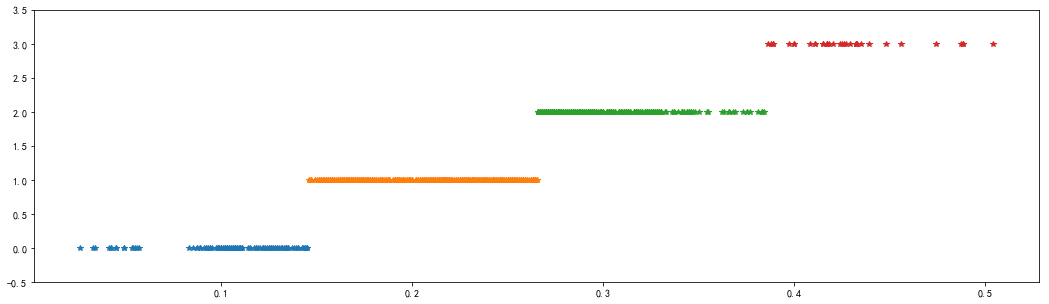

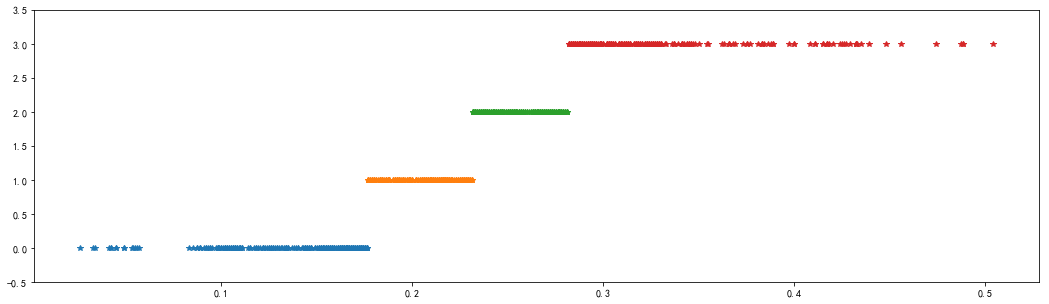

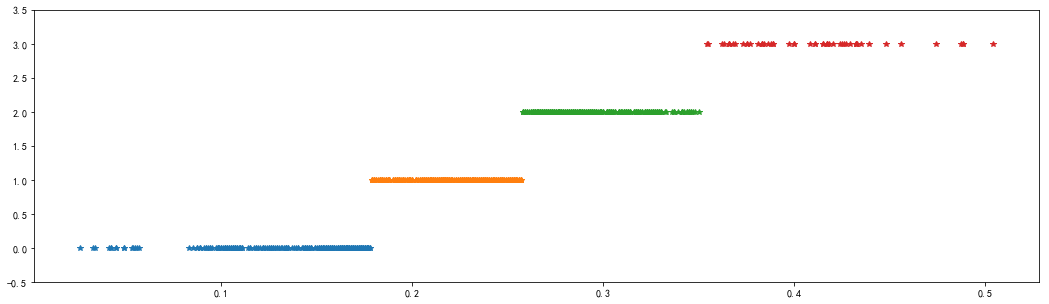

In [18]:
def cluster_plot(d,k):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize = (18,5))
    for j in range(0,k):
        plt.plot(data[d==j],[j for i in d[d==j]],'*')
    
    plt.ylim(-0.5,k-0.5)
    return plt

cluster_plot(d1,k).show()
cluster_plot(d2,k).show()
cluster_plot(d3,k).show()

# 4、属性构造


<img src='chapter4\img\4-3-7.png'>

In [14]:
import pandas as pd
inputfile = 'chapter4\data\electricity_data.xls'
outputfile = 'chapter4/tmp/electricity_data.xls'

data = pd.read_excel(inputfile)
data['线损率'] = (data['供入电量']-data['供出电量'])/data['供入电量']

data.to_excel(outputfile,index = False)

In [15]:
data

,供入电量,供出电量,线损率
0,986,912,0.075051
1,1208,1083,0.103477
2,1108,975,0.120036
3,1082,934,0.136784
4,1285,1102,0.142412


# 5、小波变换


<img src='chapter4\img\4-3-8.png'>

<img src='chapter4\img\4-3-9.png'>


<img src='chapter4\img\4-3-10.png'>

## 小波变换特征提取

In [16]:
inputfile = 'chapter4/data/leleccum.mat'

from scipy.io import loadmat
mat = loadmat(inputfile)
signal = mat['leleccum'][0]
mat

{'leleccum': array([[420.20278994, 423.52653517, 423.52271225, ..., 323.96580997,
         323.2400761 , 323.85476049]])}

In [17]:
signal

array([420.20278994, 423.52653517, 423.52271225, ..., 323.96580997,
       323.2400761 , 323.85476049])

In [18]:
import pywt #导入PyWavelets小波分析库
coeffs = pywt.wavedec(signal,'bior3.7',level = 5) 

In [19]:
coeffs

[array([2415.1478541 , 2395.74470824, 2402.22022728, 2408.90987352,
        2402.22022728, 2395.74470824, 2415.1478541 , 2369.53622493,
        1958.0913368 , 1983.87619596, 1901.68851538, 1651.86483216,
        1482.45129628, 1356.98779058, 1257.4459793 , 1265.75505172,
        1363.66712581, 1427.53767222, 1568.87951307, 1893.80694993,
        2295.89161125, 2555.9239482 , 2778.31817145, 2871.0940301 ,
        2954.38189098, 2981.0281365 , 2986.06286012, 3091.56214184,
        3085.0678644 , 2840.05639099, 2782.74679521, 2776.99922688,
        2833.0658032 , 2907.76710805, 2496.58749928, 2443.95791914,
        2338.50723857, 2394.15834442, 2186.86013504, 2142.10730351,
        2066.37469747, 2097.47366057, 2190.20987484, 2024.82470966,
        1999.88792082, 1761.22260043, 2012.8983115 , 1733.14320566,
        1955.69105593, 2296.53399998, 2332.11621828, 2436.91433782,
        2248.43497823, 1928.01215666, 1900.73383661, 1804.08152916,
        1596.93576991, 1375.26325034, 1301.52662

In [20]:
A0,A1,A2,A3,A4,A5 = coeffs

In [21]:
A0

array([2415.1478541 , 2395.74470824, 2402.22022728, 2408.90987352,
       2402.22022728, 2395.74470824, 2415.1478541 , 2369.53622493,
       1958.0913368 , 1983.87619596, 1901.68851538, 1651.86483216,
       1482.45129628, 1356.98779058, 1257.4459793 , 1265.75505172,
       1363.66712581, 1427.53767222, 1568.87951307, 1893.80694993,
       2295.89161125, 2555.9239482 , 2778.31817145, 2871.0940301 ,
       2954.38189098, 2981.0281365 , 2986.06286012, 3091.56214184,
       3085.0678644 , 2840.05639099, 2782.74679521, 2776.99922688,
       2833.0658032 , 2907.76710805, 2496.58749928, 2443.95791914,
       2338.50723857, 2394.15834442, 2186.86013504, 2142.10730351,
       2066.37469747, 2097.47366057, 2190.20987484, 2024.82470966,
       1999.88792082, 1761.22260043, 2012.8983115 , 1733.14320566,
       1955.69105593, 2296.53399998, 2332.11621828, 2436.91433782,
       2248.43497823, 1928.01215666, 1900.73383661, 1804.08152916,
       1596.93576991, 1375.26325034, 1301.52662997, 1239.15426

In [22]:
A1

array([-5.11468240e+00, -7.78481941e+00, -5.59636066e+00,  5.68434189e-14,
        5.59636066e+00,  7.78481941e+00,  5.11468240e+00, -2.81258232e+00,
        3.26062134e+01,  2.68735619e+01,  1.20971007e+01, -5.07671404e-01,
        7.62522769e+00, -6.84072854e-01, -1.16884926e+01, -1.18088402e+01,
        1.33926665e+01, -2.01235299e+01,  3.48260315e+00, -3.54659040e+00,
        2.01837609e+01,  1.15681152e+01, -1.18638949e+01,  6.84726925e+00,
       -4.11590600e+00, -1.02132760e+01, -1.27666042e+01, -9.20952401e+00,
        2.77461418e+01, -3.98479118e+01,  5.15429218e+01,  6.60716803e+01,
        3.46710408e+01,  5.15409412e+01, -1.97726577e+00, -1.73356501e+01,
       -2.98726832e+01,  6.88709748e+01,  4.13412171e+01, -3.34948636e+00,
       -3.74146943e+00,  1.88164077e+00, -1.79587054e+01, -1.10115156e+01,
        5.35815207e+00, -9.54447993e+00, -3.58666643e+01, -2.27141233e+01,
       -1.10221405e+02, -8.13158319e+01, -7.74112994e+01, -7.01880092e+01,
       -3.44548030e+01, -

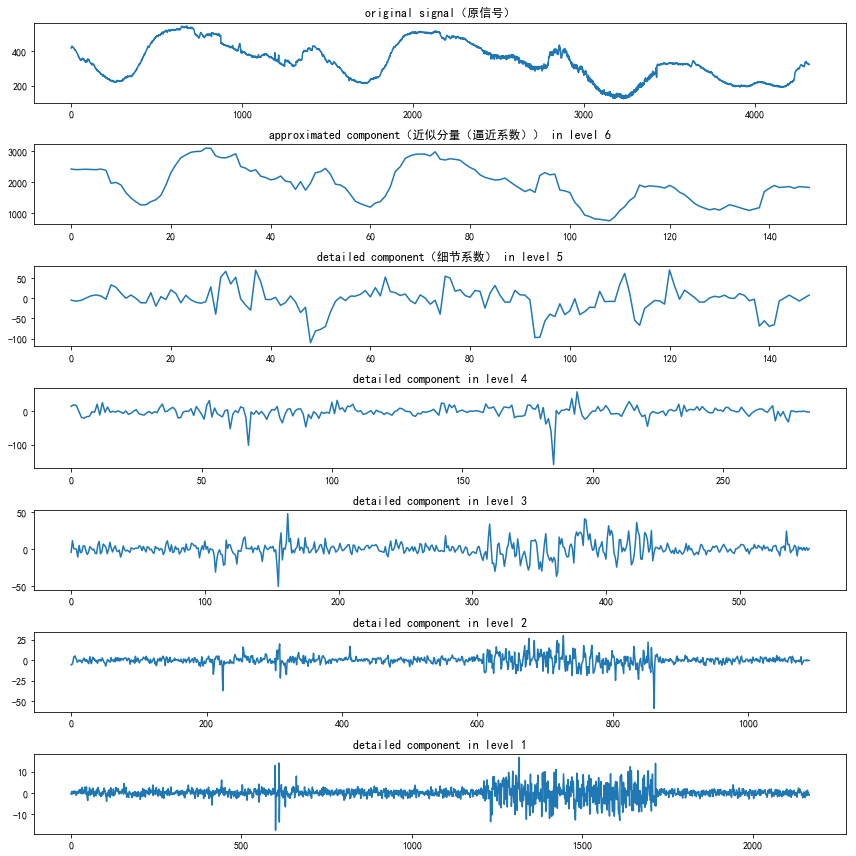

In [34]:
plt.figure(figsize=(12, 12))

plt.subplot(711)
plt.plot(range(len(signal)), signal)
plt.title('original signal（原信号）')
plt.subplot(712)
plt.plot(range(len(A0)), A0)
plt.title('approximated component（近似分量（逼近系数）） in level 6')
plt.subplot(713)
plt.plot(range(len(A1)), A1)
plt.title('detailed component（细节系数） in level 5')
plt.subplot(714)
plt.plot(range(len(A2)), A2)
plt.title('detailed component in level 4')
plt.subplot(715)
plt.plot(range(len(A3)), A3)
plt.title('detailed component in level 3')
plt.subplot(716)
plt.plot(range(len(A4)), A4)
plt.title('detailed component in level 2')
plt.subplot(717)
plt.plot(range(len(A5)), A5)
plt.title('detailed component in level 1')

plt.tight_layout()
plt.show()